# Excel

In [12]:
ENV["LINES"] = 10
ENV["COLUMNS"] = 1000

1000

In [36]:
using DataFrames
using DataFramesMeta
using XLSX
using Gadfly

In [14]:
ifn = "../../data/chapter-2/data/1-2-2020.xlsx"
xf = XLSX.readxlsx("../../data/chapter-2/data/1-2-2020.xlsx")

XLSXFile("1-2-2020.xlsx") containing 10 Worksheets
            sheetname size          range        
-------------------------------------------------
               2020.4 55x23         A1:W55       
               2020.5 55x23         A1:W55       
               2020.6 55x23         A1:W55       
               2020.7 55x23         A1:W55       
               2020.8 55x23         A1:W55       
               2020.9 55x23         A1:W55       
              2020.10 55x23         A1:W55       
              2020.11 55x23         A1:W55       
              2020.12 55x23         A1:W55       
               2021.1 55x23         A1:W55       


In [15]:
function read_excel()
    function make_header(header_M)
        row, col = size(header_M)
        # ffillをrow方向に行う
        for j in 1:col
            for i in 2:row
                if ismissing(header_M[i, j])
                    header_M[i, j] = header_M[i - 1, j]
                end
            end
        end
        # ffillを列方向に行う
        for i in 1:row
            for j in 2:col
                if ismissing(header_M[i, j])
                    header_M[i, j] = header_M[i, j - 1]
                end
            end
        end
        # 連結する
        headers = Vector{String}()
        for i in 1:col
            col = ""
            for j in 1:row
                if j != 1
                    col *= "_"
                end
                col *= header_M[j, i]
            end
            append!(headers, [col])
        end

        return headers
    end

    ifn = "../../data/chapter-2/data/1-2-2020.xlsx"
    xf = XLSX.readxlsx("../../data/chapter-2/data/1-2-2020.xlsx")
    df = DataFrame()
    for sheet_i in XLSX.sheetnames(xf)
        sh = xf[sheet_i]
        header_M = sh[:][2:4, :]
        headers = make_header(header_M)
        data_M = sh[:][5:51, :]
        tmp_df = DataFrame(data_M, headers)
        @transform!(tmp_df, :年月 = sheet_i)
        append!(df, tmp_df)
    end

    # df = @chain df begin
    #     @rtransform begin
    #         Symbol("火力発電所発電所数") = Symbol("火力発電所発電所数")
    #         # :火力発電所発電所数 = Symbol("火力発電所発電所数") - :新エネルギー等発電所〔バイオマス〕発電所数 - :新エネルギー等発電所〔廃棄物〕発電所数
    #         :火力発電所最大出力計 = :火力発電所最大出力計 - :新エネルギー等発電所〔バイオマス〕最大出力計 - :新エネルギー等発電所〔廃棄物〕最大出力計
    #     end
    # end
    df[!, "火力発電所_火力発電所_発電所数"] = df[!, "火力発電所_火力発電所_発電所数"] - df[!, "新エネルギー等発電所_〔バイオマス〕_発電所数"] - df[!, "新エネルギー等発電所_〔廃棄物〕_発電所数"]
    df[!, "火力発電所_火力発電所_最大出力計"] = df[!, "火力発電所_火力発電所_最大出力計"] - df[!, "新エネルギー等発電所_〔バイオマス〕_最大出力計"] - df[!, "新エネルギー等発電所_〔廃棄物〕_最大出力計"]
    return df
end

read_excel (generic function with 1 method)

In [16]:
df = read_excel()

470×24 DataFrame
 Row │ 都道府県_都道府県_都道府県  水力発電所_水力発電所_発電所数  水力発電所_水力発電所_最大出力計  火力発電所_火力発電所_発電所数  火力発電所_火力発電所_最大出力計  原子力発電所_原子力発電所_発電所数  原子力発電所_原子力発電所_最大出力計  新エネルギー等発電所_風力_発電所数  新エネルギー等発電所_風力_最大出力計  新エネルギー等発電所_太陽光_発電所数  新エネルギー等発電所_太陽光_最大出力計  新エネルギー等発電所_地熱_発電所数  新エネルギー等発電所_地熱_最大出力計  新エネルギー等発電所_〔バイオマス〕_発電所数  新エネルギー等発電所_〔バイオマス〕_最大出力計  新エネルギー等発電所_〔廃棄物〕_発電所数  新エネルギー等発電所_〔廃棄物〕_最大出力計  新エネルギー等発電所_計_発電所数  新エネルギー等発電所_計_最大出力計  その他_その他_発電所数  その他_その他_最大出力計  合計_合計_発電所数  合計_合計_最大出力計  年月   
     │ Any                         Any                             Any                               Int64                           Int64                             Any                                 Any                                   Any                                 Any                                   Any                                   Any                                     Any                                 Any                                   Any                                           Any                                             Any                                       Any                                         Any                               Any                                 Any                     Any                       Any                 Any                   String 
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 北海道                      98                              2.03208e6                                                     26                           6030310  1                                   2070000                               56                                  428134                                127                                   6.75751e5                               1                                   25000                                 3                                             96650                                           3                                         49920                                       184                               1.12889e6                           0                       0                         315                 1.14078e7             2020.4
  ⋮  │             ⋮                             ⋮                                ⋮                                ⋮                                ⋮                                  ⋮                                    ⋮                                    ⋮                                    ⋮                                     ⋮                                      ⋮                                     ⋮                                    ⋮                                         ⋮                                              ⋮                                            ⋮                                          ⋮                                      ⋮                                  ⋮                             ⋮                        ⋮                      ⋮                    ⋮              ⋮
                                                                                                                                                                                                                                                                       

In [17]:
select!(df, Not([Symbol("合計_合計_発電所数"), Symbol("合計_合計_最大出力計"), Symbol("新エネルギー等発電所_計_発電所数"), Symbol("新エネルギー等発電所_計_最大出力計")]))

470×20 DataFrame
 Row │ 都道府県_都道府県_都道府県  水力発電所_水力発電所_発電所数  水力発電所_水力発電所_最大出力計  火力発電所_火力発電所_発電所数  火力発電所_火力発電所_最大出力計  原子力発電所_原子力発電所_発電所数  原子力発電所_原子力発電所_最大出力計  新エネルギー等発電所_風力_発電所数  新エネルギー等発電所_風力_最大出力計  新エネルギー等発電所_太陽光_発電所数  新エネルギー等発電所_太陽光_最大出力計  新エネルギー等発電所_地熱_発電所数  新エネルギー等発電所_地熱_最大出力計  新エネルギー等発電所_〔バイオマス〕_発電所数  新エネルギー等発電所_〔バイオマス〕_最大出力計  新エネルギー等発電所_〔廃棄物〕_発電所数  新エネルギー等発電所_〔廃棄物〕_最大出力計  その他_その他_発電所数  その他_その他_最大出力計  年月   
     │ Any                         Any                             Any                               Int64                           Int64                             Any                                 Any                                   Any                                 Any                                   Any                                   Any                                     Any                                 Any                                   Any                                           Any                                             Any                                       Any                                         Any                     Any                       String 
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 北海道                      98                              2.03208e6                                                     26                           6030310  1                                   2070000                               56                                  428134                                127                                   6.75751e5                               1                                   25000                                 3                                             96650                                           3                                         49920                                       0                       0                         2020.4
  ⋮  │             ⋮                             ⋮                                ⋮                                ⋮                                ⋮                                  ⋮                                    ⋮                                    ⋮                                    ⋮                                     ⋮                                      ⋮                                     ⋮                                    ⋮                                         ⋮                                              ⋮                                            ⋮                                          ⋮                                 ⋮                        ⋮                ⋮
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                469 rows omitted

In [18]:
function split_variable(variable)
    x, y, z = split(variable, "_")
    return x, replace(y, "発電所" => ""), z
end
df1 = @chain df begin
    stack(Not([Symbol("都道府県_都道府県_都道府県"), Symbol("年月")]))
    rename("都道府県_都道府県_都道府県" => "都道府県")
    @rtransform begin
        @astable begin
            x, y, z = split_variable(:variable)
            :発電所種別 = x
            :発電種別 = y
            :項目 = z
        end
    end
    @select($(Not([:variable])))
end

8460×6 DataFrame
  Row │ 都道府県  年月    value  発電所種別  発電種別  項目       
      │ Any       String  Any    SubString…  String    SubString… 
──────┼───────────────────────────────────────────────────────────
    1 │ 北海道    2020.4  98     水力発電所  水力      発電所数
  ⋮   │    ⋮        ⋮       ⋮        ⋮          ⋮          ⋮
                                                 8459 rows omitted

In [19]:
function read_excel()
    function make_header(header_M)
        row, col = size(header_M)
        # ffillをrow方向に行う
        for j in 1:col
            for i in 2:row
                if ismissing(header_M[i, j])
                    header_M[i, j] = header_M[i - 1, j]
                end
            end
        end
        # ffillを列方向に行う
        for i in 1:row
            for j in 2:col
                if ismissing(header_M[i, j])
                    header_M[i, j] = header_M[i, j - 1]
                end
            end
        end
        # 連結する
        headers = Vector{String}()
        for i in 1:col
            col = ""
            for j in 1:row
                if j != 1
                    col *= "_"
                end
                col *= header_M[j, i]
            end
            append!(headers, [col])
        end

        return headers
    end

    ifn = "../../data/chapter-2/data/2-2-2020.xlsx"
    xf = XLSX.readxlsx(ifn)
    df = DataFrame()
    for sheet_i in XLSX.sheetnames(xf)
        # sh = XLSX.readdata(ifn, sheet_i, "A1:W55")
        sh = XLSX.readdata(ifn, sheet_i, "A1:L55")
        header_M = sh[2:4, :]
        headers = make_header(header_M)
        data_M = sh[5:51, :]
        tmp_df = DataFrame(data_M, headers)
        @transform!(tmp_df, :年月 = sheet_i)
        append!(df, tmp_df)
    end

    # df = @chain df begin
    #     @rtransform begin
    #         Symbol("火力発電所発電所数") = Symbol("火力発電所発電所数")
    #         # :火力発電所発電所数 = Symbol("火力発電所発電所数") - :新エネルギー等発電所〔バイオマス〕発電所数 - :新エネルギー等発電所〔廃棄物〕発電所数
    #         :火力発電所最大出力計 = :火力発電所最大出力計 - :新エネルギー等発電所〔バイオマス〕最大出力計 - :新エネルギー等発電所〔廃棄物〕最大出力計
    #     end
    # end
    df[!, "火力発電所_火力発電所_電力量"] = df[!, "火力発電所_火力発電所_電力量"] - df[!, "新エネルギー等発電所_〔バイオマス〕_電力量"] - df[!, "新エネルギー等発電所_〔廃棄物〕_電力量"]
    # df[!, "火力発電所_火力発電所_最大出力計"] = df[!, "火力発電所_火力発電所_最大出力計"] - df[!, "新エネルギー等発電所_〔バイオマス〕_最大出力計"] - df[!, "新エネルギー等発電所_〔廃棄物〕_最大出力計"]
    return df
end

read_excel (generic function with 1 method)

In [20]:
df = read_excel()

470×13 DataFrame
 Row │ 都道府県_都道府県_都道府県  水力発電所_水力発電所_電力量  火力発電所_火力発電所_電力量  原子力発電所_原子力発電所_電力量  新エネルギー等発電所_風力_電力量  新エネルギー等発電所_太陽光_電力量  新エネルギー等発電所_地熱_電力量  新エネルギー等発電所_〔バイオマス〕_電力量  新エネルギー等発電所_〔廃棄物〕_電力量  新エネルギー等発電所_計_電力量  その他_その他_電力量  合計_合計_電力量  年月   
     │ Any                         Any                           Float64                       Any                               Any                               Any                                 Any                               Any                                         Any                                     Any                             Any                   Any               String 
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 北海道                      4.08779e5                                        1.70477e6  0.0                               86901.4                           1.0471e5                            10354.0                           100682.0                                    32870.0                                 2.01965e5                       0.0                   2.44906e6         2020.4
  ⋮  │             ⋮                            ⋮                             ⋮                               ⋮                                 ⋮                                  ⋮                                  ⋮                                      ⋮                                         ⋮                                   ⋮                          ⋮                   ⋮            ⋮
                                                                                                                                                                                                                                                                                                                                                                                            469 rows omitted

In [21]:
select!(df, Not([Symbol("合計_合計_電力量"), Symbol("新エネルギー等発電所_計_電力量")]))

470×11 DataFrame
 Row │ 都道府県_都道府県_都道府県  水力発電所_水力発電所_電力量  火力発電所_火力発電所_電力量  原子力発電所_原子力発電所_電力量  新エネルギー等発電所_風力_電力量  新エネルギー等発電所_太陽光_電力量  新エネルギー等発電所_地熱_電力量  新エネルギー等発電所_〔バイオマス〕_電力量  新エネルギー等発電所_〔廃棄物〕_電力量  その他_その他_電力量  年月   
     │ Any                         Any                           Float64                       Any                               Any                               Any                                 Any                               Any                                         Any                                     Any                   String 
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 北海道                      4.08779e5                                        1.70477e6  0.0                               86901.4                           1.0471e5                            10354.0                           100682.0                                    32870.0                                 0.0                   2020.4
  ⋮  │             ⋮                            ⋮                             ⋮                               ⋮                                 ⋮                                  ⋮                                  ⋮                                      ⋮                                         ⋮                              ⋮              ⋮
                                                                                                                                                                                                                                                                                                                                          469 rows omitted

In [22]:
df2 = @chain df begin
    stack(Not([Symbol("都道府県_都道府県_都道府県"), Symbol("年月")]))
    rename("都道府県_都道府県_都道府県" => "都道府県")
    @rtransform begin
        @astable begin
            x, y, z = split_variable(:variable)
            :発電所種別 = x
            :発電種別 = y
            :項目 = z
        end
    end
    @select($(Not([:variable])))
end

4230×6 DataFrame
  Row │ 都道府県  年月    value      発電所種別  発電種別  項目       
      │ Any       String  Any        SubString…  String    SubString… 
──────┼───────────────────────────────────────────────────────────────
    1 │ 北海道    2020.4  4.08779e5  水力発電所  水力      電力量
  ⋮   │    ⋮        ⋮         ⋮          ⋮          ⋮          ⋮
                                                     4229 rows omitted

In [26]:
df = append!(df1, df2)

16920×6 DataFrame
   Row │ 都道府県  年月    value  発電所種別  発電種別  項目       
       │ Any       String  Any    SubString…  String    SubString… 
───────┼───────────────────────────────────────────────────────────
     1 │ 北海道    2020.4  98     水力発電所  水力      発電所数
   ⋮   │    ⋮        ⋮       ⋮        ⋮          ⋮          ⋮
                                                 16919 rows omitted

In [34]:
@chain df begin
    @rsubset(:年月 == "2020.4")
    groupby([:発電所種別, :項目])
    @combine(:value = sum(:value))
    unstack(:発電所種別, :項目, :value)
end

5×4 DataFrame
 Row │ 発電所種別            発電所数  最大出力計     電力量        
     │ SubString…            Float64?  Float64?       Float64?      
─────┼──────────────────────────────────────────────────────────────
   1 │ 水力発電所              1748.0      4.9638e7       1.65933e7
  ⋮  │          ⋮               ⋮            ⋮              ⋮
                                                      4 rows omitted

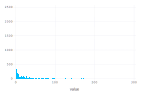

In [37]:
@chain df begin
    @rsubset(:項目 == "発電所数")
    plot(x = :value, Geom.histogram())
end

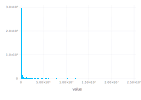

In [38]:
@chain df begin
    @rsubset(:項目 == "最大出力計")
    plot(x = :value, Geom.histogram())
end

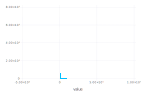

In [39]:
@chain df begin
    @rsubset(:項目 == "電力量")
    plot(x = :value, Geom.histogram())
end

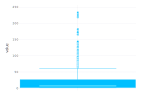

In [41]:
@chain df begin
    @rsubset(:項目 == "発電所数", :value != 0)
    plot(y = :value, Geom.boxplot())
end

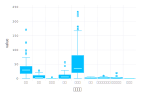

In [43]:
@chain df begin
    @rsubset(:項目 == "発電所数", :value != 0)
    plot(y = :value, x = :発電種別, Geom.boxplot())
end

In [44]:
@chain df begin
    @rsubset(:項目 == "電力量", :年月 == "2021.1")
    groupby(:発電種別)
    @combine(:value = sum(:value))
end

9×2 DataFrame
 Row │ 発電種別        value          
     │ String          Float64        
─────┼────────────────────────────────
   1 │ 水力                 1.03677e7
  ⋮  │       ⋮               ⋮
                        8 rows omitted

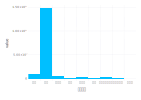

In [46]:
@chain df begin
    @rsubset(:項目 == "電力量", :年月 == "2021.1")
    groupby(:発電種別)
    @combine(:value = sum(:value))
    plot(x = :発電種別, y = :value, Geom.bar())
end

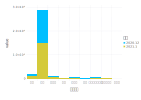

In [50]:
@chain df begin
    @rsubset(:項目 == "電力量", :年月 in ["2021.1", "2020.12"])
    groupby([:発電種別, :年月])
    @combine(:value = sum(:value))
    plot(x = :発電種別, y = :value, color=:年月, Geom.bar())
end

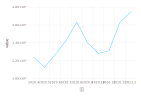

In [52]:
@chain df begin
    @rsubset(:項目 == "電力量")
    @select(:発電種別, :年月, :value)
    groupby(:年月)
    @combine(:value = sum(:value))
    plot(x = :年月, y = :value, Geom.line())
end

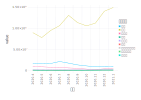

In [53]:
@chain df begin
    @rsubset(:項目 == "電力量")
    @select(:発電種別, :年月, :value)
    groupby([:発電種別, :年月])
    @combine(:value = sum(:value))
    plot(x = :年月, y = :value, color=:発電種別, Geom.line())
end

In [55]:
@chain df begin
    @rsubset(:項目 == "電力量", :年月 == "2021.1")
    groupby([:発電種別])
    @combine(:value = sum(:value))
    @transform(:ratio = :value ./ sum(:value))
    # plot(x = :年月, y = :value, color=:発電種別, Geom.line())
end

9×3 DataFrame
 Row │ 発電種別        value           ratio       
     │ String          Float64         Float64     
─────┼─────────────────────────────────────────────
   1 │ 水力                 1.03677e7  0.0593925
  ⋮  │       ⋮               ⋮              ⋮
                                     8 rows omitted

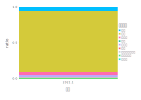

In [63]:
@chain df begin
    @rsubset(:項目 == "電力量", :年月 == "2021.1")
    groupby([:発電種別, :年月])
    @combine(:value = sum(:value))
    @transform(:ratio = :value ./ sum(:value))
    plot(x = :年月, y = :ratio, color=:発電種別, Geom.bar())
end

In [65]:
@chain df begin
    @rsubset(:項目 == "電力量")
    groupby([:都道府県])
    @combine(:value = sum(:value))
    sort(:value, rev=true)
    # @transform(:ratio = :value ./ sum(:value))
    # plot(x = :年月, y = :ratio, color=:発電種別, Geom.bar())
end

47×2 DataFrame
 Row │ 都道府県  value     
     │ Any       Float64   
─────┼─────────────────────
   1 │ 千葉県    1.36937e8
  ⋮  │    ⋮          ⋮
            46 rows omitted

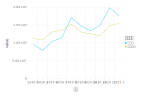

In [66]:
@chain df begin
    @rsubset(:項目 == "電力量", :都道府県 in ["千葉県", "神奈川県"])
    groupby([:都道府県, :年月])
    @combine(:value = sum(:value))
    plot(x = :年月, y = :value, color=:都道府県, Geom.line())
end

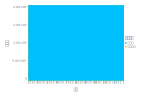

In [79]:
@chain df begin
    @rsubset(:項目 in ["電力量", "発電所数"], :都道府県 in ["千葉県", "神奈川県"])
    groupby([:都道府県, :年月, :項目])
    @combine(:value = sum(:value))
    unstack([:年月, :都道府県], :項目, :value)
    # plot(x = :年月, y = :電力量, color=:都道府県, size=:発電所数, Geom.point, Scale.size_area(maxvalue=maximum(:発電所数)))
    plot(x = :年月, y = :電力量, color=:都道府県, size=:発電所数, Geom.point)
end

In [81]:
@chain df begin
    @rsubset(:項目 in ["電力量"])
    groupby([:都道府県, :年月, :項目])
    @combine(:value = sum(:value))
    unstack(:都道府県, :年月, :value)
    # plot(x = :年月, y = :電力量, color=:都道府県, size=:発電所数, Geom.point, Scale.size_area(maxvalue=maximum(:発電所数)))
    # plot(x = :年月, y = :電力量, color=:都道府県, size=:発電所数, Geom.point)
end

47×11 DataFrame
 Row │ 都道府県  2020.4          2020.5          2020.6     2020.7          2020.8          2020.9     2020.10    2020.11    2020.12    2021.1    
     │ Any       Float64?        Float64?        Float64?   Float64?        Float64?        Float64?   Float64?   Float64?   Float64?   Float64?  
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 北海道         4.89813e6       4.55886e6  4.38462e6       4.32833e6       4.56907e6  4.37634e6  4.46803e6  4.96318e6  6.32311e6  7.14377e6
  ⋮  │    ⋮            ⋮               ⋮             ⋮            ⋮               ⋮             ⋮          ⋮          ⋮          ⋮          ⋮
                                                                                                                                   46 rows omitted

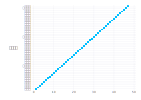

In [90]:
@chain df begin
    @rsubset(:項目 in ["電力量"])
    groupby([:都道府県, :年月, :項目])
    @combine(:value = sum(:value))
    unstack(:都道府県, :年月, :value)
    plot(y = :都道府県, Geom.rectbin)
end

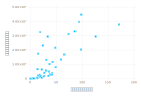

In [98]:
@chain df begin
    @rsubset begin
        :項目 in ["発電所数", "最大出力計"]
        :発電種別 in ["水力"]
        :発電所種別 in ["水力発電所"]
    end
    @rtransform(:new_col = :発電所種別 * :発電種別 * :項目)
    unstack([:都道府県, :年月], :new_col, :value)
    plot(x = :水力発電所水力発電所数, y = :水力発電所水力最大出力計, Geom.point)
end

In [105]:
df_out = @chain df begin
    groupby([:年月, :都道府県, :項目])
    @combine(:value = sum(:value))
    unstack([:年月, :都道府県], :項目, :value)
end
XLSX.writetable("./summary_data.xlsx", "sheet1" => df_out)

LoadError: AssertionError: ./summary_data.xlsx already exists.

In [110]:
function get_result(df, prefecture)::DataFrame
    return @chain df begin
        @rsubset(:都道府県 == "北海道")
        @rtransform(:new_col = :発電所種別 * :項目)
        groupby([:年月, :new_col])
        @combine(:value = sum(:value))
        unstack(:年月, :new_col, :value)
    end
end

get_result (generic function with 1 method)

In [131]:
for prefecture_i in unique(df[!, :都道府県])
    tmp_df = get_result(df, prefecture_i)
    # println(first(tmp_df, 10))
    println(prefecture_i)
    XLSX.writetable("./detail_data.xlsx", overwrite = true, prefecture_i => tmp_df)
end

北海道
青森県
岩手県
宮城県
秋田県
山形県
福島県
茨城県
栃木県
群馬県
埼玉県
千葉県
東京都
神奈川県
新潟県
富山県
石川県
福井県
山梨県
長野県
岐阜県
静岡県
愛知県
三重県
滋賀県
京都府
大阪府
兵庫県
奈良県
和歌山県
鳥取県
島根県
岡山県
広島県
山口県
徳島県
香川県
愛媛県
高知県
福岡県
佐賀県
長崎県
熊本県
大分県
宮崎県
鹿児島県
沖縄県


In [128]:
df

16920×6 DataFrame
   Row │ 都道府県  年月    value  発電所種別  発電種別  項目       
       │ Any       String  Any    SubString…  String    SubString… 
───────┼───────────────────────────────────────────────────────────
     1 │ 北海道    2020.4  98     水力発電所  水力      発電所数
   ⋮   │    ⋮        ⋮       ⋮        ⋮          ⋮          ⋮
                                                 16919 rows omitted